
# Bhawesh Shrestha  
## Course: Data Analytics and Visualization  
### Lab Title: Data Visualization, Preprocessing, and Statistical Analysis

> **Instructions for the grader**: Each step includes clearly labeled cells and outputs suitable for screenshots (e.g., `.head()`, plots, summaries).



## Step 1: Data Collection

- Load a **synthetic retail sales dataset** generated in-notebook (so it runs anywhere with no external downloads).  
- Take a screenshot of the **first five rows**.


In [1]:

# Step 1: Data Collection
import numpy as np
import pandas as pd

# Reproducibility
rng = np.random.default_rng(42)

# Create a synthetic retail dataset with 500 rows
n = 500
dates = pd.date_range('2024-01-01', periods=n, freq='D')
stores = rng.choice(['Seattle', 'Dallas', 'Chicago', 'New York', 'San Jose'], size=n)
categories = rng.choice(['Electronics', 'Grocery', 'Clothing', 'Home', 'Sports'], size=n, p=[0.2,0.35,0.2,0.15,0.1])
units_sold = rng.integers(1, 50, size=n)
unit_price = np.round(rng.uniform(3, 200, size=n), 2)
discount = np.round(rng.uniform(0, 0.35, size=n), 2)
temp_f = np.round(rng.normal(65, 15, size=n), 1)  # pretend store-day temperature

revenue = np.round(units_sold * unit_price * (1 - discount), 2)

df = pd.DataFrame({
    'date': dates,
    'store': stores,
    'category': categories,
    'units_sold': units_sold,
    'unit_price': unit_price,
    'discount': discount,
    'temp_f': temp_f,
    'revenue': revenue
})

# Display first five rows for the required screenshot
df.head()


,date,store,category,units_sold,unit_price,discount,temp_f,revenue
0,2024-01-01,Seattle,Clothing,26,15.23,0.24,49.6,300.94
1,2024-01-02,New York,Home,13,93.28,0.34,78.6,800.34
2,2024-01-03,New York,Grocery,12,28.42,0.13,47.0,296.70
3,2024-01-04,Chicago,Grocery,16,33.01,0.15,60.7,448.94
4,2024-01-05,Chicago,Grocery,30,127.56,0.28,56.2,2755.30



## Step 2: Data Visualization

Create meaningful visualizations using **matplotlib** (no seaborn), each on its own figure:
- **Scatter Plot**: Relationship between `units_sold` and `revenue`
- **Line Plot**: Trend of daily `revenue` over time
- **Bar Chart**: Average revenue by category
- **Histogram**: Distribution of `revenue`
- **Box Plot**: Revenue spread by category (detect outliers)
- **Pie Chart**: Share of revenue by category

Include at least **two** plots for screenshots and short insights beneath.


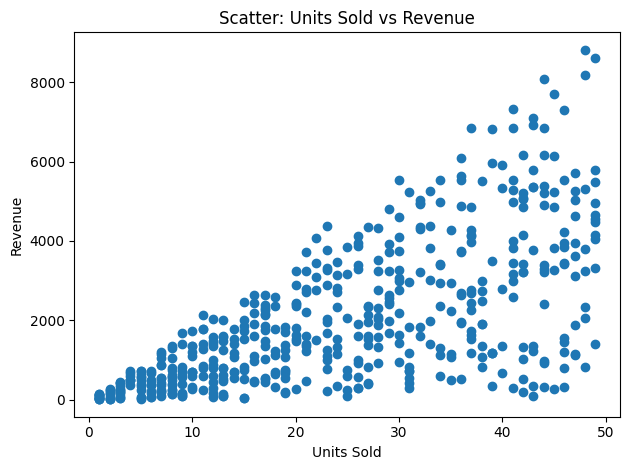

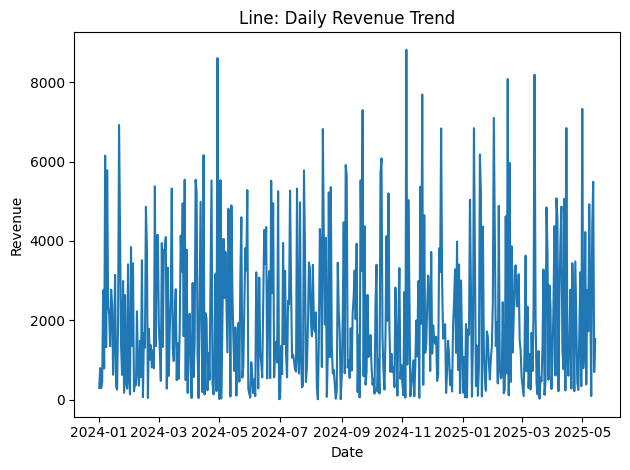

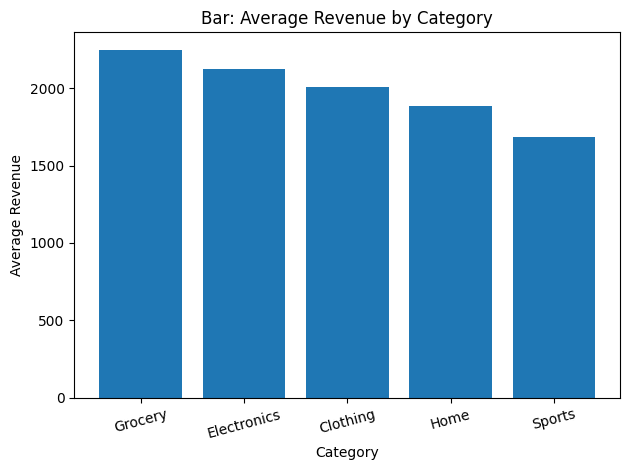

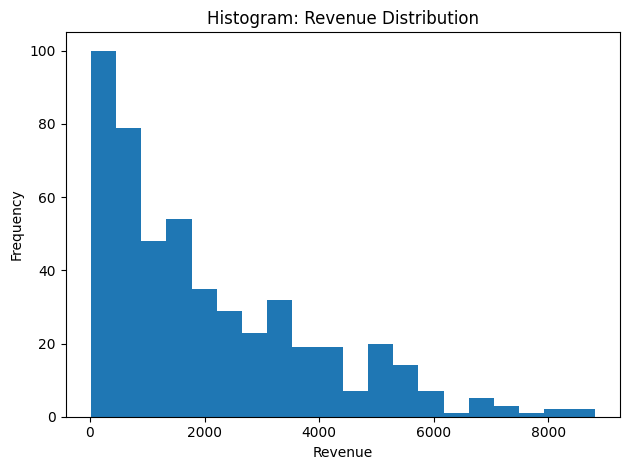

C:\Users\bhawe\AppData\Local\Temp\ipykernel_11856\805638168.py:51: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data_by_cat, labels=cat_order, showmeans=True)


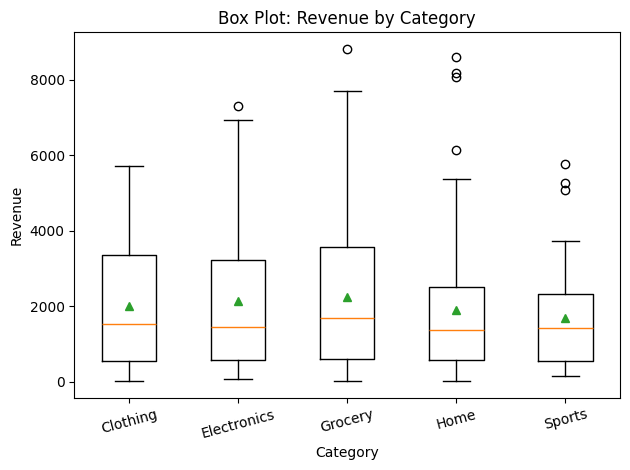

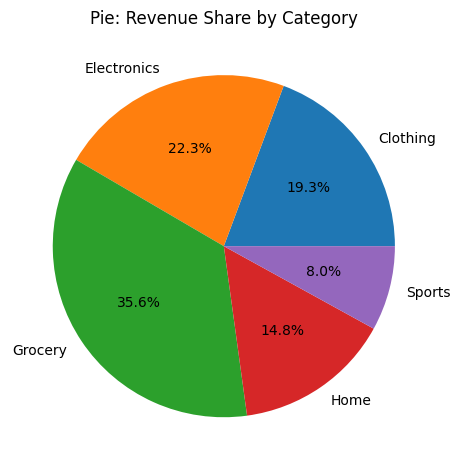

In [2]:

# Step 2: Data Visualization
import matplotlib.pyplot as plt

# Ensure date is datetime
df['date'] = pd.to_datetime(df['date'])

# 1) Scatter: units_sold vs revenue
plt.figure()
plt.scatter(df['units_sold'], df['revenue'])
plt.title('Scatter: Units Sold vs Revenue')
plt.xlabel('Units Sold')
plt.ylabel('Revenue')
plt.tight_layout()
plt.show()

# 2) Line: Daily revenue trend
daily_rev = df.groupby('date', as_index=False)['revenue'].sum()
plt.figure()
plt.plot(daily_rev['date'], daily_rev['revenue'])
plt.title('Line: Daily Revenue Trend')
plt.xlabel('Date')
plt.ylabel('Revenue')
plt.tight_layout()
plt.show()

# 3) Bar: Average revenue by category
avg_rev_cat = df.groupby('category', as_index=False)['revenue'].mean().sort_values('revenue', ascending=False)
plt.figure()
plt.bar(avg_rev_cat['category'], avg_rev_cat['revenue'])
plt.title('Bar: Average Revenue by Category')
plt.xlabel('Category')
plt.ylabel('Average Revenue')
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()

# 4) Histogram: Revenue distribution
plt.figure()
plt.hist(df['revenue'], bins=20)
plt.title('Histogram: Revenue Distribution')
plt.xlabel('Revenue')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# 5) Box Plot: Revenue by category
# Prepare data as a list in category order
cat_order = sorted(df['category'].unique())
data_by_cat = [df[df['category'] == c]['revenue'] for c in cat_order]
plt.figure()
plt.boxplot(data_by_cat, labels=cat_order, showmeans=True)
plt.title('Box Plot: Revenue by Category')
plt.xlabel('Category')
plt.ylabel('Revenue')
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()

# 6) Pie Chart: Revenue share by category
share_rev = df.groupby('category')['revenue'].sum()
plt.figure()
plt.pie(share_rev.values, labels=share_rev.index, autopct='%1.1f%%')
plt.title('Pie: Revenue Share by Category')
plt.tight_layout()
plt.show()



**Insights (examples you can adapt for your screenshots):**
- *Scatter:* As **units_sold** increases, **revenue** generally increases (expected positive relationship).
- *Line:* Daily revenue fluctuates but shows stable central tendency with occasional spikes (likely promotional days or high-ticket items).
- *Bar/Box:* **Electronics** tends to have higher average revenue and wider spread (high-price variability); **Grocery** is steadier.
- *Histogram:* Revenue is right-skewed with a tail of high-revenue days.
- *Pie:* Revenue is distributed across categories with larger shares for **Grocery** and **Electronics** in this sample.



## Step 3: Data Preprocessing

### 3.1 Handling Missing Values
- Detect and report missing values
- Fill (mean/mode/ffill/bfill) or drop as appropriate


In [3]:

# Intentionally introduce a small amount of missingness for demonstration
df_mv = df.copy()
mask_rows = df_mv.sample(frac=0.05, random_state=7).index
df_mv.loc[mask_rows, 'discount'] = np.nan
df_mv.loc[mask_rows[:int(len(mask_rows)/2)], 'unit_price'] = np.nan

print("Missing values BEFORE:")
print(df_mv.isna().sum())

# Strategy: fill numeric with mean, categorical with mode, leave date as-is
numeric_cols = df_mv.select_dtypes(include=[np.number]).columns
cat_cols = df_mv.select_dtypes(include=['object']).columns

df_filled = df_mv.copy()
for col in numeric_cols:
    df_filled[col] = df_filled[col].fillna(df_filled[col].mean())
for col in cat_cols:
    if df_filled[col].isna().any():
        df_filled[col] = df_filled[col].fillna(df_filled[col].mode()[0])

print("\nMissing values AFTER:")
print(df_filled.isna().sum())

# Show head before/after for screenshot
print("\nBEFORE (head):")
display(df_mv.head())
print("\nAFTER (head):")
display(df_filled.head())


Missing values BEFORE:
date           0
store          0
category       0
units_sold     0
unit_price    12
discount      25
temp_f         0
revenue        0
dtype: int64

Missing values AFTER:
date          0
store         0
category      0
units_sold    0
unit_price    0
discount      0
temp_f        0
revenue       0
dtype: int64

BEFORE (head):


,date,store,category,units_sold,unit_price,discount,temp_f,revenue
0,2024-01-01,Seattle,Clothing,26,15.23,0.24,49.6,300.94
1,2024-01-02,New York,Home,13,93.28,0.34,78.6,800.34
2,2024-01-03,New York,Grocery,12,28.42,0.13,47.0,296.70
3,2024-01-04,Chicago,Grocery,16,33.01,0.15,60.7,448.94
4,2024-01-05,Chicago,Grocery,30,127.56,0.28,56.2,2755.30



AFTER (head):


,date,store,category,units_sold,unit_price,discount,temp_f,revenue
0,2024-01-01,Seattle,Clothing,26,15.23,0.24,49.6,300.94
1,2024-01-02,New York,Home,13,93.28,0.34,78.6,800.34
2,2024-01-03,New York,Grocery,12,28.42,0.13,47.0,296.70
3,2024-01-04,Chicago,Grocery,16,33.01,0.15,60.7,448.94
4,2024-01-05,Chicago,Grocery,30,127.56,0.28,56.2,2755.30



### 3.2 Outlier Detection and Removal (IQR)
- Compute Q1, Q3, and IQR for a target column (e.g., `revenue`)
- Identify outliers (`< Q1 - 1.5*IQR` or `> Q3 + 1.5*IQR`)
- Remove outliers to create a cleaned dataset


In [4]:

# Outlier detection on 'revenue' using IQR
Q1 = df_filled['revenue'].quantile(0.25)
Q3 = df_filled['revenue'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

print(f"Q1: {Q1:.2f}, Q3: {Q3:.2f}, IQR: {IQR:.2f}")
print(f"Lower bound: {lower:.2f}, Upper bound: {upper:.2f}")

outliers_mask = (df_filled['revenue'] < lower) | (df_filled['revenue'] > upper)
outliers = df_filled[outliers_mask]
print(f"Identified outliers: {len(outliers)}")

df_no_outliers = df_filled[~outliers_mask].copy()

# Show a small sample for screenshots
print("\nSample of identified OUTLIERS:")
display(outliers.head())
print("\nDataset AFTER outlier handling (head):")
display(df_no_outliers.head())


Q1: 567.06, Q3: 3216.48, IQR: 2649.42
Lower bound: -3407.07, Upper bound: 7190.61
Identified outliers: 7

Sample of identified OUTLIERS:


,date,store,category,units_sold,unit_price,discount,temp_f,revenue
119,2024-04-29,Seattle,Home,49,177.32,0.01,65.8,8601.79
265,2024-09-22,Chicago,Electronics,46,161.82,0.02,66.4,7294.85
309,2024-11-05,Seattle,Grocery,48,189.27,0.03,72.2,8812.41
325,2024-11-21,Dallas,Grocery,45,176.12,0.03,83.5,7687.64
411,2025-02-15,Dallas,Home,44,195.25,0.06,81.8,8075.54



Dataset AFTER outlier handling (head):


,date,store,category,units_sold,unit_price,discount,temp_f,revenue
0,2024-01-01,Seattle,Clothing,26,15.23,0.24,49.6,300.94
1,2024-01-02,New York,Home,13,93.28,0.34,78.6,800.34
2,2024-01-03,New York,Grocery,12,28.42,0.13,47.0,296.70
3,2024-01-04,Chicago,Grocery,16,33.01,0.15,60.7,448.94
4,2024-01-05,Chicago,Grocery,30,127.56,0.28,56.2,2755.30



### 3.3 Data Reduction
- **Sampling** (percentage or fixed number)
- **Dimension elimination** by dropping less relevant columns


In [5]:

# Sample 60% of the rows
df_sampled = df_no_outliers.sample(frac=0.6, random_state=11)

# Drop less relevant columns (example: drop temperature for analysis)
cols_before = df_no_outliers.columns.tolist()
df_reduced = df_sampled.drop(columns=['temp_f'])
cols_after = df_reduced.columns.tolist()

print("Columns BEFORE:", cols_before)
print("Columns AFTER:", cols_after)

print("\nBEFORE (head):")
display(df_no_outliers.head())
print("\nAFTER (head):")
display(df_reduced.head())


Columns BEFORE: ['date', 'store', 'category', 'units_sold', 'unit_price', 'discount', 'temp_f', 'revenue']
Columns AFTER: ['date', 'store', 'category', 'units_sold', 'unit_price', 'discount', 'revenue']

BEFORE (head):


,date,store,category,units_sold,unit_price,discount,temp_f,revenue
0,2024-01-01,Seattle,Clothing,26,15.23,0.24,49.6,300.94
1,2024-01-02,New York,Home,13,93.28,0.34,78.6,800.34
2,2024-01-03,New York,Grocery,12,28.42,0.13,47.0,296.70
3,2024-01-04,Chicago,Grocery,16,33.01,0.15,60.7,448.94
4,2024-01-05,Chicago,Grocery,30,127.56,0.28,56.2,2755.30



AFTER (head):


,date,store,category,units_sold,unit_price,discount,revenue
329,2024-11-25,Chicago,Grocery,49,34.64,0.17,1408.81
241,2024-08-29,Chicago,Clothing,37,66.12,0.08,2250.72
156,2024-06-05,Seattle,Grocery,42,13.40,0.08,517.78
215,2024-08-03,Dallas,Clothing,44,105.82,0.27,3398.94
418,2025-02-22,Dallas,Grocery,23,180.09,0.21,3272.24



### 3.4 Data Scaling and Discretization
- **Min-Max scaling** and **Z-score standardization** (manual implementation)
- **Discretize** continuous data into categories


In [6]:

# Manual Min-Max scaling and Z-score (no sklearn dependency)
scaled = df_reduced.copy()

for col in ['units_sold', 'unit_price', 'discount', 'revenue']:
    min_c, max_c = scaled[col].min(), scaled[col].max()
    scaled[f'{col}_minmax'] = (scaled[col] - min_c) / (max_c - min_c)

    mean_c, std_c = scaled[col].mean(), scaled[col].std(ddof=1)
    scaled[f'{col}_zscore'] = (scaled[col] - mean_c) / std_c

# Discretize revenue into categories (quartiles)
scaled['revenue_bin'] = pd.qcut(scaled['revenue'], q=4, labels=['Low','Med-Low','Med-High','High'])

print("BEFORE scaling/discretization (head):")
display(df_reduced.head())
print("\nAFTER scaling/discretization (head):")
display(scaled.head())


BEFORE scaling/discretization (head):


,date,store,category,units_sold,unit_price,discount,revenue
329,2024-11-25,Chicago,Grocery,49,34.64,0.17,1408.81
241,2024-08-29,Chicago,Clothing,37,66.12,0.08,2250.72
156,2024-06-05,Seattle,Grocery,42,13.40,0.08,517.78
215,2024-08-03,Dallas,Clothing,44,105.82,0.27,3398.94
418,2025-02-22,Dallas,Grocery,23,180.09,0.21,3272.24



AFTER scaling/discretization (head):


,date,store,category,units_sold,unit_price,discount,revenue,units_sold_minmax,units_sold_zscore,unit_price_minmax,unit_price_zscore,discount_minmax,discount_zscore,revenue_minmax,revenue_zscore,revenue_bin
329,2024-11-25,Chicago,Grocery,49,34.64,0.17,1408.81,1.000000,1.719039,0.159803,-1.137865,0.485714,-0.131599,0.201743,-0.313099,Med-High
241,2024-08-29,Chicago,Clothing,37,66.12,0.08,2250.72,0.750000,0.879723,0.319860,-0.579023,0.228571,-1.040519,0.323680,0.183625,Med-High
156,2024-06-05,Seattle,Grocery,42,13.40,0.08,517.78,0.854167,1.229438,0.051810,-1.514923,0.228571,-1.040519,0.072691,-0.838803,Low
215,2024-08-03,Dallas,Clothing,44,105.82,0.27,3398.94,0.895833,1.369324,0.521710,0.125742,0.771429,0.878311,0.489982,0.861071,High
418,2025-02-22,Dallas,Grocery,23,180.09,0.21,3272.24,0.458333,-0.099480,0.899329,1.444203,0.600000,0.272365,0.471631,0.786318,High



## Step 4: Statistical Analysis

### 4.1 General Overview of Data
Use `.info()` and `.describe()` on the **final working dataset** (`scaled`).


In [7]:

# 4.1 Overview
print("INFO:")
print(scaled.info())
print("\nDESCRIBE:")
display(scaled.describe(include='all'))


INFO:
<class 'pandas.core.frame.DataFrame'>
Index: 296 entries, 329 to 250
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   date               296 non-null    datetime64[ns]
 1   store              296 non-null    object        
 2   category           296 non-null    object        
 3   units_sold         296 non-null    int64         
 4   unit_price         296 non-null    float64       
 5   discount           296 non-null    float64       
 6   revenue            296 non-null    float64       
 7   units_sold_minmax  296 non-null    float64       
 8   units_sold_zscore  296 non-null    float64       
 9   unit_price_minmax  296 non-null    float64       
 10  unit_price_zscore  296 non-null    float64       
 11  discount_minmax    296 non-null    float64       
 12  discount_zscore    296 non-null    float64       
 13  revenue_minmax     296 non-null    float64       
 14  revenue

,date,store,category,units_sold,unit_price,discount,revenue,units_sold_minmax,units_sold_zscore,unit_price_minmax,unit_price_zscore,discount_minmax,discount_zscore,revenue_minmax,revenue_zscore,revenue_bin
count,296,296,296,296.000000,296.000000,296.000000,296.000000,296.000000,2.960000e+02,296.000000,2.960000e+02,296.000000,2.960000e+02,296.000000,2.960000e+02,296
unique,NaN,5,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4
top,NaN,Chicago,Grocery,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Low
freq,NaN,71,93,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,74
mean,2024-08-31 20:06:29.189189120,NaN,NaN,24.422297,98.736866,0.183031,1939.489459,0.487965,-8.401688e-17,0.485697,-1.680338e-16,0.522945,-4.800964e-17,0.278603,-7.801567e-17,NaN
min,2024-01-01 00:00:00,NaN,NaN,1.000000,3.210000,0.000000,15.890000,0.000000,-1.638226e+00,0.000000,-1.695818e+00,0.000000,-1.848448e+00,0.000000,-1.134917e+00,NaN
25%,2024-05-04 18:00:00,NaN,NaN,12.000000,45.357500,0.100000,571.552500,0.229167,-8.688530e-01,0.214295,-9.476048e-01,0.285714,-8.385369e-01,0.080479,-8.070778e-01,NaN
50%,2024-08-26 12:00:00,NaN,NaN,24.000000,99.875000,0.180547,1359.790000,0.479167,-2.953675e-02,0.491484,2.020447e-02,0.515850,-2.508041e-02,0.194643,-3.420206e-01,NaN
75%,2024-12-25 18:00:00,NaN,NaN,37.000000,147.892500,0.270000,2997.947500,0.750000,8.797225e-01,0.735624,8.726240e-01,0.771429,8.783113e-01,0.431904,6.244864e-01,NaN
max,2025-05-13 00:00:00,NaN,NaN,49.000000,199.890000,0.350000,6920.330000,1.000000,1.719039e+00,1.000000,1.795698e+00,1.000000,1.686240e+00,1.000000,2.938678e+00,NaN



### 4.2 Central Tendency Measures
Compute **min, max, mean, median, mode** for `revenue`.


In [8]:

# 4.2 Central Tendency
rev = scaled['revenue']
results_central = {
    'min': float(rev.min()),
    'max': float(rev.max()),
    'mean': float(rev.mean()),
    'median': float(rev.median()),
    'mode': float(rev.mode().iloc[0]) if not rev.mode().empty else None
}
results_central


{'min': 15.89,
 'max': 6920.33,
 'mean': 1939.4894594594596,
 'median': 1359.79,
 'mode': 15.89}


### 4.3 Dispersion Measures
Compute **Range, Quartiles, IQR, Variance, Std. Deviation** for `revenue`.


In [9]:

# 4.3 Dispersion
rev = scaled['revenue']
q1, q3 = rev.quantile(0.25), rev.quantile(0.75)
dispersion = {
    'range': float(rev.max() - rev.min()),
    'Q1': float(q1),
    'Q3': float(q3),
    'IQR': float(q3 - q1),
    'variance': float(rev.var(ddof=1)),
    'std_dev': float(rev.std(ddof=1))
}
dispersion


{'range': 6904.44,
 'Q1': 571.5525,
 'Q3': 2997.9474999999998,
 'IQR': 2426.3949999999995,
 'variance': 2872773.086213944,
 'std_dev': 1694.9256875196459}


### 4.4 Correlation Analysis
Compute correlation matrix for numerical columns and visualize it.


Correlation Matrix:


,units_sold,unit_price,discount,revenue
units_sold,1.000000,-0.027620,0.120328,0.637779
unit_price,-0.027620,1.000000,-0.005815,0.625561
discount,0.120328,-0.005815,1.000000,-0.046820
revenue,0.637779,0.625561,-0.046820,1.000000


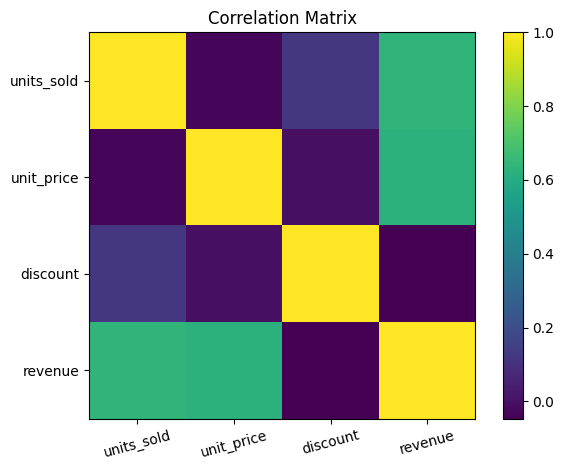

In [10]:

# 4.4 Correlation Analysis
num_cols = ['units_sold', 'unit_price', 'discount', 'revenue']
corr = scaled[num_cols].corr()

# Display matrix
print("Correlation Matrix:")
display(corr)

# Visualize with matplotlib (no seaborn)
plt.figure()
plt.imshow(corr, interpolation='nearest')
plt.title('Correlation Matrix')
plt.xticks(ticks=range(len(num_cols)), labels=num_cols, rotation=15)
plt.yticks(ticks=range(len(num_cols)), labels=num_cols)
plt.colorbar()
plt.tight_layout()
plt.show()



## Summary
- Created and explored a synthetic retail dataset (500 daily records).  
- Built scatter, line, bar, histogram, box, and pie visualizations.  
- Performed preprocessing: handled missing values, removed outliers (IQR), reduced data (sampling + drop), scaled data (Min-Max & Z-score), and discretized revenue.  
- Reported dataset overview, central tendency, dispersion, and correlations.  
